<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.sample(n = 5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3602,7,44.40,265.8,Male,1,No,No,No,No phone service,DSL,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,0
1137,25,20.20,507.9,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0
4726,61,68.05,4158.25,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
3021,55,20.00,1087.25,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),0
3428,39,99.75,4036,Female,1,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
data[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5282 non-null   int64  
 1   MonthlySpending  5282 non-null   float64
 2   TotalSpent       5282 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 123.9+ KB


Найдены несколько пробелов, их необходимо устранить.

In [8]:
def remove_whitespaces(row):
    try:
        row = float(row)
        return row
    except ValueError:
        return 0.

data['TotalSpent'] = data['TotalSpent'].apply(remove_whitespaces)

Пропусков больше не видно. Преобразуем два выявленных некоректных признаков.

In [9]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

array([[<AxesSubplot:title={'center':'ClientPeriod'}>,
        <AxesSubplot:title={'center':'MonthlySpending'}>],
       [<AxesSubplot:title={'center':'TotalSpent'}>, <AxesSubplot:>]],
      dtype=object)

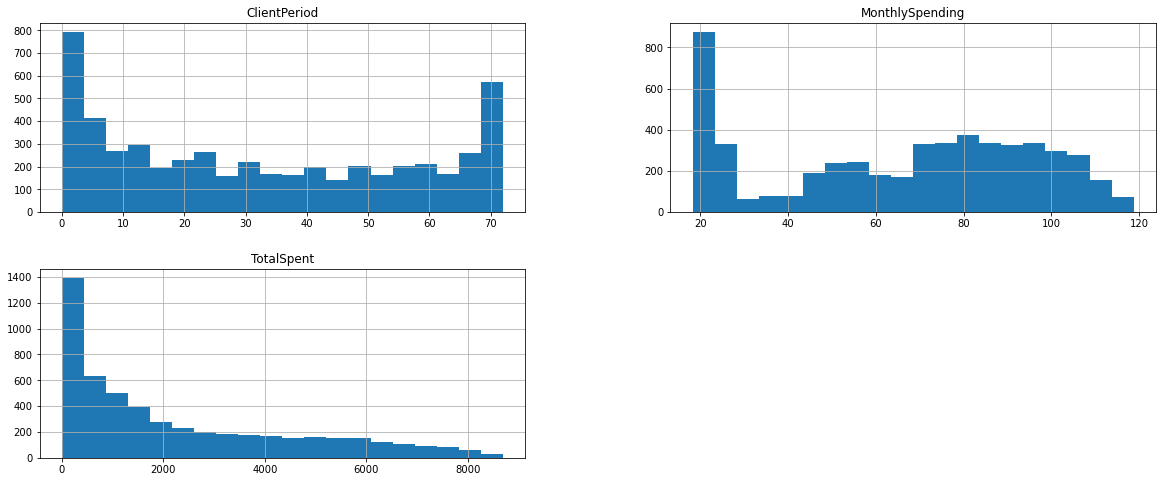

In [10]:
data.hist(column=num_cols, figsize=(20, 8), bins = 20)

<AxesSubplot:>

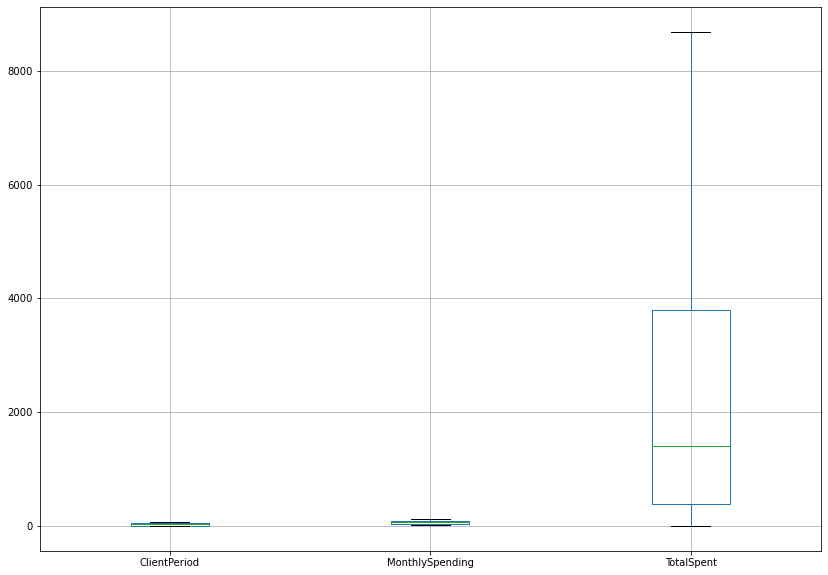

In [11]:
data.boxplot(column=num_cols, figsize=(14, 10))

<ipython-input-12-8b11079211ea>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(col_values.index, rotation = 30)
<ipython-input-12-8b11079211ea>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


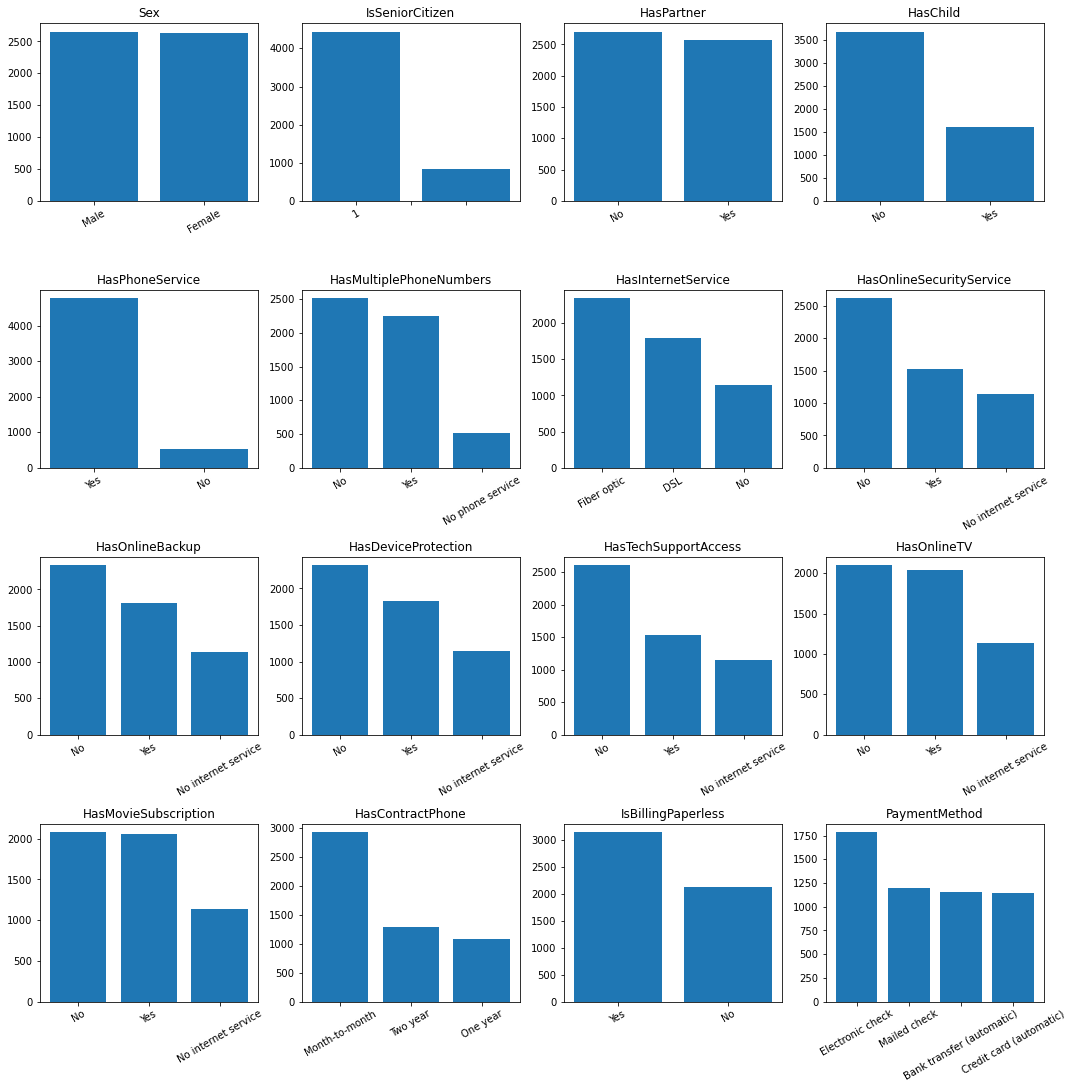

In [12]:
fig, ax = plt.subplots(4, 4, figsize=(18,18))
ax = ax.ravel()

for i, col in enumerate(cat_cols):
  ax[i].set_title(col)
  col_values = data[col].value_counts()
  ax[i].bar(col_values.index, col_values.values)
  ax[i].set_xticklabels(col_values.index, rotation = 30)
  

plt.subplots_adjust(hspace = 0.5)
fig.show()

Заметим, что масштаб разный, поэтому для применения модлелей придется их отмасштабировать.

<BarContainer object of 2 artists>

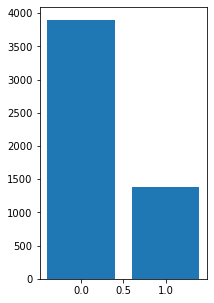

In [13]:
fig = plt.figure(figsize = (3, 5))
ax0 = fig.add_subplot(111)
target_value = data[target_col].value_counts()
ax0.bar(target_value.index, target_value.values)

In [14]:
target_value

0    3898
1    1384
Name: Churn, dtype: int64

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [15]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [16]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [31]:
dum_data = pd.get_dummies(data[cat_cols])

In [32]:
X = data[num_cols + cat_cols]
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [28]:
prepare_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(), cat_cols)
    ])

full_pipeline = Pipeline([
        ("preparation", prepare_pipeline),
        ("linear", LogisticRegression(solver = 'liblinear', random_state=42))
    ])

In [29]:
C_values = [120, 100, 10, 1, 0.1, 0.01, 0.001]

param_grid = [
        {'linear__penalty':['l1', 'l2'],
         'linear__C':C_values
         }
    ]

In [30]:
grid_search = GridSearchCV(full_pipeline, 
                          param_grid, 
                          scoring='roc_auc', 
                          verbose=4)

In [33]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END .linear__C=120, linear__penalty=l1;, score=0.842 total time=   0.2s
[CV 2/5] END .linear__C=120, linear__penalty=l1;, score=0.872 total time=   0.4s
[CV 3/5] END .linear__C=120, linear__penalty=l1;, score=0.855 total time=   0.4s
[CV 4/5] END .linear__C=120, linear__penalty=l1;, score=0.831 total time=   0.1s
[CV 5/5] END .linear__C=120, linear__penalty=l1;, score=0.813 total time=   0.1s
[CV 1/5] END .linear__C=120, linear__penalty=l2;, score=0.842 total time=   0.0s
[CV 2/5] END .linear__C=120, linear__penalty=l2;, score=0.872 total time=   0.0s
[CV 3/5] END .linear__C=120, linear__penalty=l2;, score=0.855 total time=   0.0s
[CV 4/5] END .linear__C=120, linear__penalty=l2;, score=0.831 total time=   0.0s
[CV 5/5] END .linear__C=120, linear__penalty=l2;, score=0.813 total time=   0.0s
[CV 1/5] END .linear__C=100, linear__penalty=l1;, score=0.842 total time=   0.4s
[CV 2/5] END .linear__C=100, linear__penalty=l1;

GridSearchCV(estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                     

In [35]:
grid_search.best_params_

{'linear__C': 120, 'linear__penalty': 'l1'}

In [36]:
grid_search.best_score_

0.8427103218493665

Лучший roc_auc_score равен 0.8427103218493665.

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [17]:
std_scaler = StandardScaler()
log_reg_cv = LogisticRegressionCV(scoring='roc_auc')

In [24]:
from catboost import CatBoostClassifier
import catboost
param_grid = {
        "learning_rate":[0.025, 0.03, 0.04],
        "min_data_in_leaf":[88, 90, 92],
        "depth": [3, 4, 5],
        "iterations":[187, 190, 193]
         } # вот разные параметры, которые мы будем пробовать
c_grid = CatBoostClassifier(cat_features=cat_cols, random_seed=42, verbose=False, eval_metric='AUC')
gs_result = c_grid.grid_search(param_grid, X_train, y=y_train)


bestTest = 0.858988534
bestIteration = 175

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8589885	best: 0.8589885 (0)	total: 2.14s	remaining: 2m 51s

bestTest = 0.858215602
bestIteration = 186

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8582156	best: 0.8589885 (0)	total: 4.25s	remaining: 2m 47s

bestTest = 0.8593289312
bestIteration = 158

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8593289	best: 0.8593289 (2)	total: 6.12s	remaining: 2m 39s

bestTest = 0.858988534
bestIteration = 175

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8589885	best: 0.8593289 (2)	total: 7.74s	remaining: 2m 29s

be

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, c_grid.predict_proba(X_train)[:, 1])

0.8540562830378673

In [26]:
roc_auc_score(y_test, c_grid.predict_proba(X_test)[:, 1])

0.8446299702844204

In [27]:
gs_result['params']

{'min_data_in_leaf': 88, 'depth': 3, 'iterations': 187, 'learning_rate': 0.04}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучший roc_auc_score с использованием модели CatBoost составляет 0.8446299702844204. Заметим, что значения на test и train выборках почти одинаковое, можно заключить, что переобучение минимально.

# Предсказания

In [37]:
best_model = CatBoostClassifier(verbose = False, cat_features = cat_cols, min_data_in_leaf = 88, iterations = 187, learning_rate = 0.03, depth = 3)

In [39]:
best_model.fit(X, y)

In [42]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission_final.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.